In [76]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm  
from sklearn.feature_selection import RFE  
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.impute import SimpleImputer


In [77]:
df =pd.read_csv("train.csv")

In [78]:
#Import Seaborn
import seaborn as sns

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [80]:
df.shape

(1460, 81)

In [81]:
df.isnull().sum().sort_values(ascending=False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

In [82]:
df.PoolQC.value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [83]:
df.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [84]:
df.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [85]:
df.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [86]:
df.FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [87]:
#Null values here means there are no fireplaceplace. Hence, this seems to add some value to the dataset. 

In [88]:
df['FireplaceQu'].replace(np.nan,'NA',inplace=True)
df.FireplaceQu.value_counts()

NA    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

#
We can drop the highest null values as it doesnt add value to the dataset

In [89]:
df.drop(['Alley',
'PoolQC',
'MiscFeature','Fence'],axis=1,inplace=True)

In [90]:
df.drop(['Id'],axis=1,inplace=True)

In [16]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
# Extract value data types 
df_val = df.select_dtypes(include=['float64', 'int64'])
df_val.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [18]:
df_val.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [19]:
df_val.shape

(1460, 37)

In [20]:
df_val.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [21]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

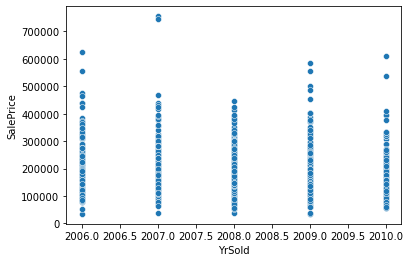

In [22]:
#Plotting scatter plot
sns.scatterplot(data=df_val,x='YrSold',y='SalePrice')


<AxesSubplot:xlabel='MSSubClass', ylabel='SalePrice'>

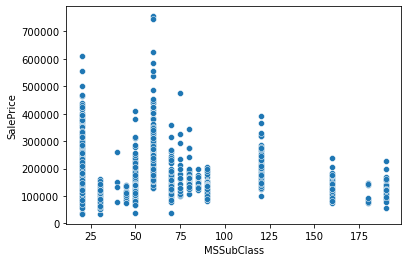

In [23]:
sns.scatterplot(data=df_val,x='MSSubClass',y='SalePrice')

<AxesSubplot:xlabel='LotFrontage', ylabel='SalePrice'>

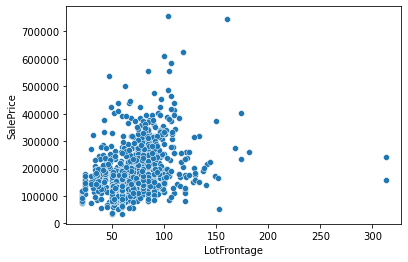

In [24]:
sns.scatterplot(data=df_val,x='LotFrontage',y='SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

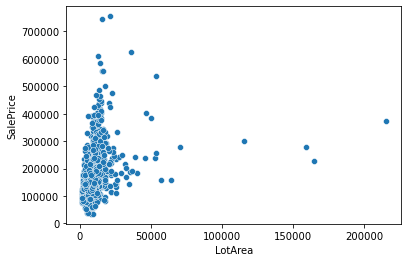

In [25]:
sns.scatterplot(data=df_val,x='LotArea',y='SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

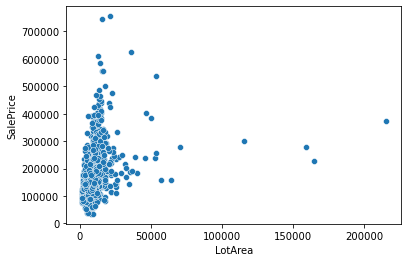

In [26]:
sns.scatterplot(data=df_val,x='LotArea',y='SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

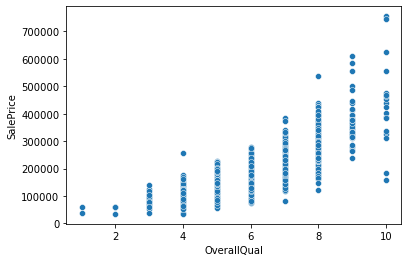

In [27]:
sns.scatterplot(data=df_val,x='OverallQual',y='SalePrice')

<AxesSubplot:xlabel='OverallCond', ylabel='SalePrice'>

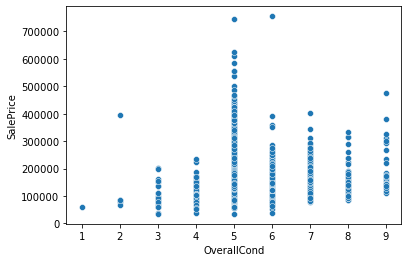

In [28]:
sns.scatterplot(data=df_val,x='OverallCond',y='SalePrice')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

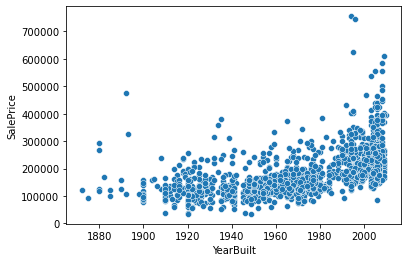

In [29]:
sns.scatterplot(data=df_val,x='YearBuilt',y='SalePrice')

<AxesSubplot:xlabel='YearRemodAdd', ylabel='SalePrice'>

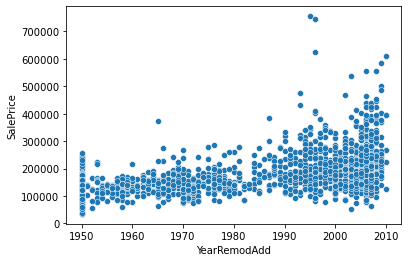

In [30]:
sns.scatterplot(data=df_val,x='YearRemodAdd',y='SalePrice')

<AxesSubplot:xlabel='MasVnrArea', ylabel='SalePrice'>

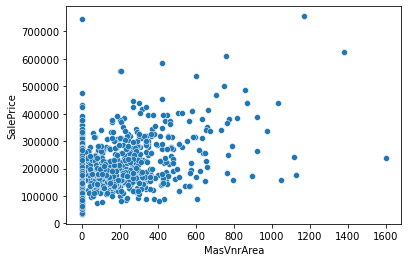

In [31]:
sns.scatterplot(data=df_val,x='MasVnrArea',y='SalePrice')

<AxesSubplot:xlabel='BsmtFinSF1', ylabel='SalePrice'>

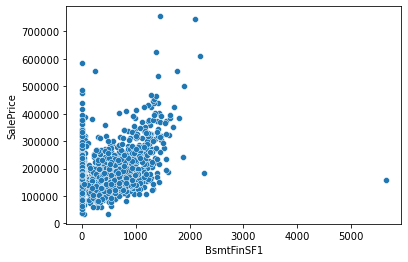

In [32]:
sns.scatterplot(data=df_val,x='BsmtFinSF1',y='SalePrice')

<AxesSubplot:xlabel='BsmtFinSF2', ylabel='SalePrice'>

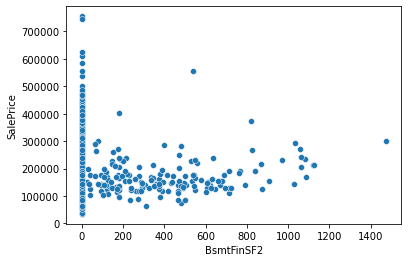

In [33]:
sns.scatterplot(data=df_val,x='BsmtFinSF2',y='SalePrice')

<AxesSubplot:xlabel='BsmtUnfSF', ylabel='SalePrice'>

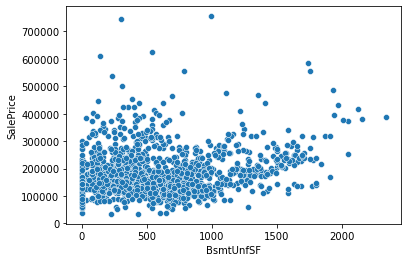

In [34]:
sns.scatterplot(data=df_val,x='BsmtUnfSF',y='SalePrice')

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

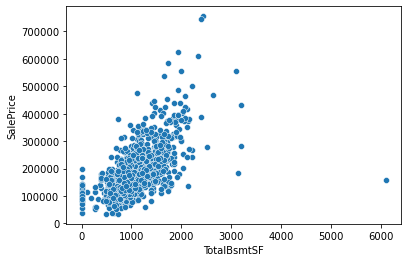

In [35]:
sns.scatterplot(data=df_val,x='TotalBsmtSF',y='SalePrice')

<AxesSubplot:xlabel='1stFlrSF', ylabel='SalePrice'>

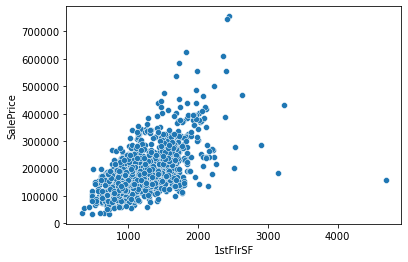

In [36]:
sns.scatterplot(data=df_val,x='1stFlrSF',y='SalePrice')

<AxesSubplot:xlabel='2ndFlrSF', ylabel='SalePrice'>

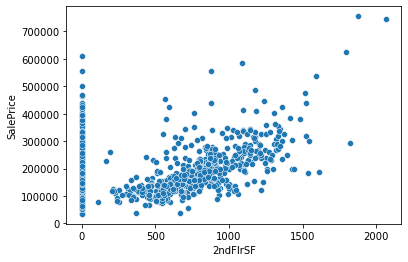

In [37]:
sns.scatterplot(data=df_val,x='2ndFlrSF',y='SalePrice')

<AxesSubplot:xlabel='LowQualFinSF', ylabel='SalePrice'>

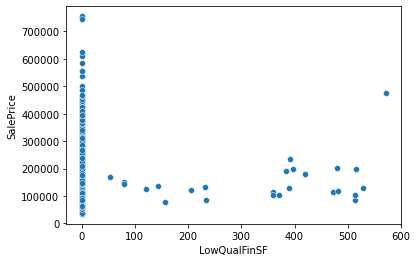

In [38]:
sns.scatterplot(data=df_val,x='LowQualFinSF',y='SalePrice')

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

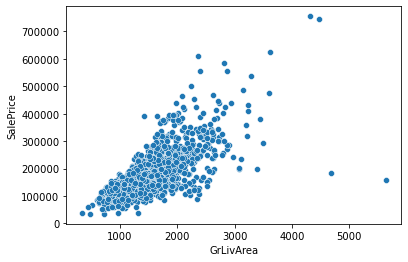

In [39]:
sns.scatterplot(data=df_val,x='GrLivArea',y='SalePrice')

<AxesSubplot:xlabel='BsmtFullBath', ylabel='SalePrice'>

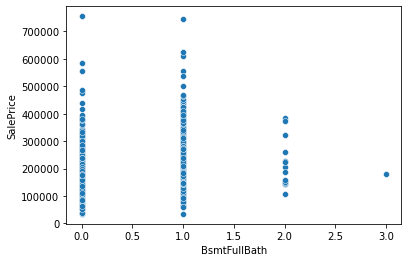

In [40]:
sns.scatterplot(data=df_val,x='BsmtFullBath',y='SalePrice')

<AxesSubplot:xlabel='BsmtHalfBath', ylabel='SalePrice'>

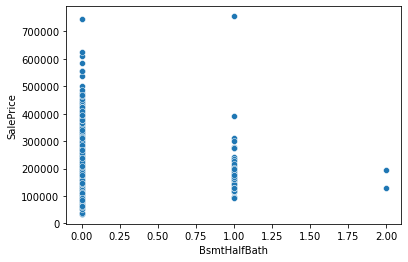

In [41]:
sns.scatterplot(data=df_val,x='BsmtHalfBath',y='SalePrice')

<AxesSubplot:xlabel='FullBath', ylabel='SalePrice'>

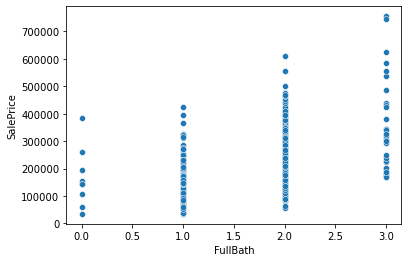

In [42]:
sns.scatterplot(data=df_val,x='FullBath',y='SalePrice')

<AxesSubplot:xlabel='HalfBath', ylabel='SalePrice'>

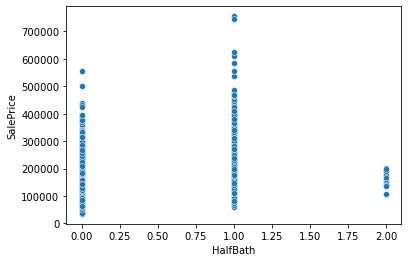

In [43]:
sns.scatterplot(data=df_val,x='HalfBath',y='SalePrice')

<AxesSubplot:xlabel='BedroomAbvGr', ylabel='SalePrice'>

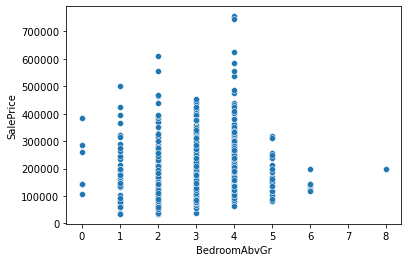

In [44]:
sns.scatterplot(data=df_val,x='BedroomAbvGr',y='SalePrice')

<AxesSubplot:xlabel='KitchenAbvGr', ylabel='SalePrice'>

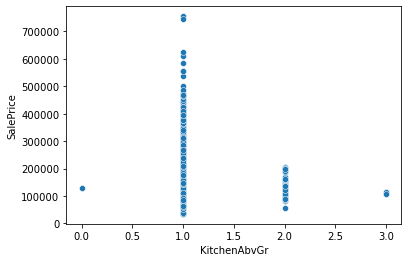

In [45]:
sns.scatterplot(data=df_val,x='KitchenAbvGr',y='SalePrice')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

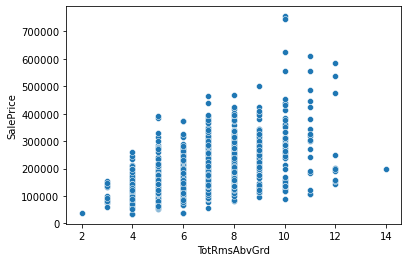

In [46]:
sns.scatterplot(data=df_val,x='TotRmsAbvGrd',y='SalePrice')

<AxesSubplot:xlabel='Fireplaces', ylabel='SalePrice'>

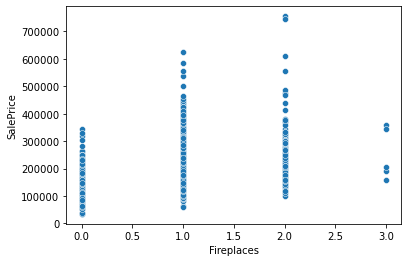

In [47]:
sns.scatterplot(data=df_val,x='Fireplaces',y='SalePrice')

<AxesSubplot:xlabel='GarageYrBlt', ylabel='SalePrice'>

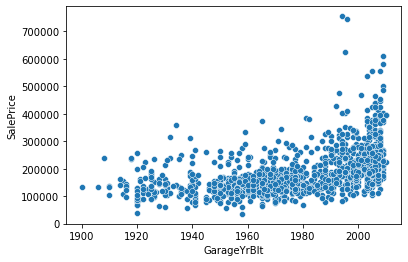

In [48]:
sns.scatterplot(data=df_val,x='GarageYrBlt',y='SalePrice')

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

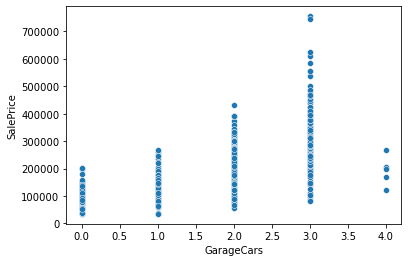

In [49]:
sns.scatterplot(data=df_val,x='GarageCars',y='SalePrice')

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

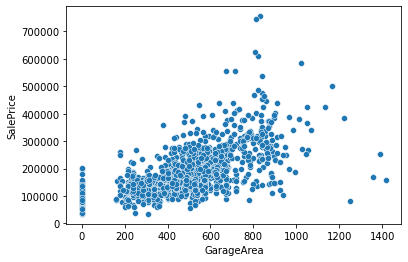

In [50]:
sns.scatterplot(data=df_val,x='GarageArea',y='SalePrice')

<AxesSubplot:xlabel='WoodDeckSF', ylabel='SalePrice'>

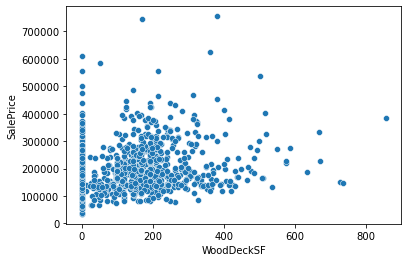

In [51]:
sns.scatterplot(data=df_val,x='WoodDeckSF',y='SalePrice')

<AxesSubplot:xlabel='OpenPorchSF', ylabel='SalePrice'>

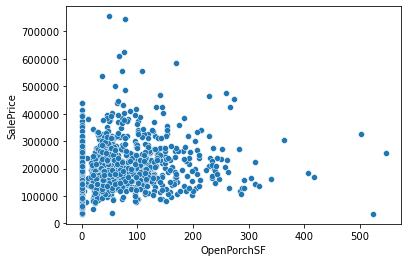

In [52]:
sns.scatterplot(data=df_val,x='OpenPorchSF',y='SalePrice')

<AxesSubplot:xlabel='EnclosedPorch', ylabel='SalePrice'>

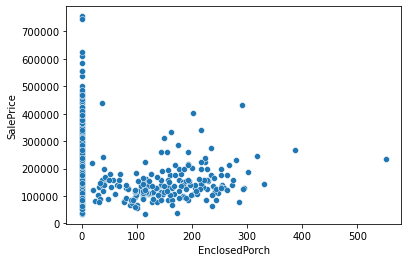

In [53]:
sns.scatterplot(data=df_val,x='EnclosedPorch',y='SalePrice')

<AxesSubplot:xlabel='3SsnPorch', ylabel='SalePrice'>

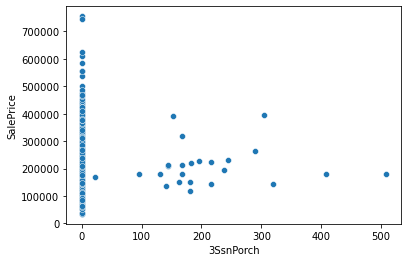

In [54]:
sns.scatterplot(data=df_val,x='3SsnPorch',y='SalePrice')

<AxesSubplot:xlabel='ScreenPorch', ylabel='SalePrice'>

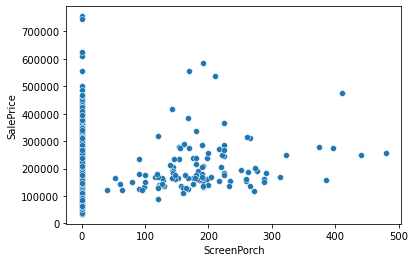

In [55]:
sns.scatterplot(data=df_val,x='ScreenPorch',y='SalePrice')

<AxesSubplot:xlabel='PoolArea', ylabel='SalePrice'>

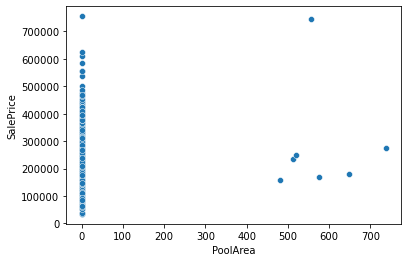

In [56]:
sns.scatterplot(data=df_val,x='PoolArea',y='SalePrice')

<AxesSubplot:xlabel='MiscVal', ylabel='SalePrice'>

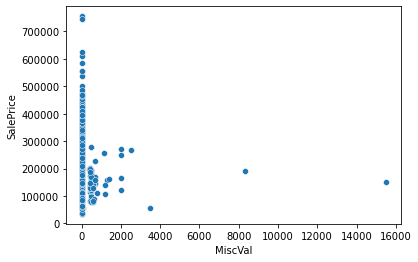

In [57]:
sns.scatterplot(data=df_val,x='MiscVal',y='SalePrice')

<AxesSubplot:xlabel='MoSold', ylabel='SalePrice'>

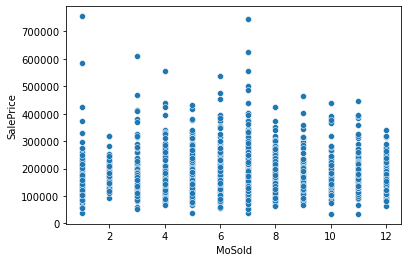

In [58]:
sns.scatterplot(data=df_val,x='MoSold',y='SalePrice')

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

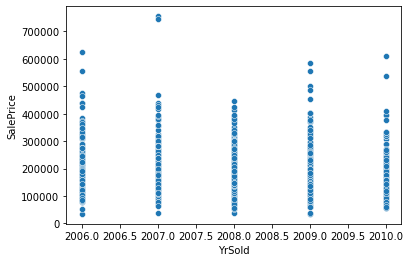

In [59]:
sns.scatterplot(data=df_val,x='YrSold',y='SalePrice')

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

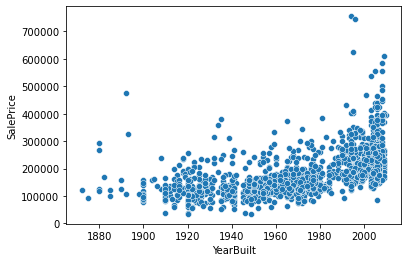

In [60]:
sns.scatterplot(data=df_val,x='YearBuilt',y='SalePrice')

<AxesSubplot:xlabel='LotArea', ylabel='SalePrice'>

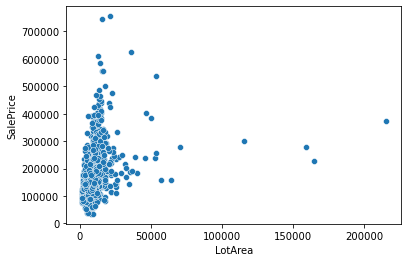

In [61]:
#Plotting scatter plot
sns.scatterplot(data=df_val,x='LotArea',y='SalePrice')

In [73]:
df_val.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,8,0,2003.0,2,548,0,61,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,6,1,1976.0,2,460,298,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,6,1,2001.0,2,608,0,42,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,7,1,1998.0,3,642,0,35,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,9,1,2000.0,3,836,192,84,12,2008,250000


In [92]:
df_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1460 non-null   int64  
 1   LotFrontage   1201 non-null   float64
 2   LotArea       1460 non-null   int64  
 3   OverallQual   1460 non-null   int64  
 4   OverallCond   1460 non-null   int64  
 5   YearBuilt     1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   MasVnrArea    1452 non-null   float64
 8   BsmtFinSF1    1460 non-null   int64  
 9   BsmtUnfSF     1460 non-null   int64  
 10  TotalBsmtSF   1460 non-null   int64  
 11  1stFlrSF      1460 non-null   int64  
 12  2ndFlrSF      1460 non-null   int64  
 13  GrLivArea     1460 non-null   int64  
 14  BsmtFullBath  1460 non-null   int64  
 15  FullBath      1460 non-null   int64  
 16  HalfBath      1460 non-null   int64  
 17  BedroomAbvGr  1460 non-null   int64  
 18  TotRmsAbvGrd  1460 non-null 

In [ ]:
df_val.drop(
    ['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal'],axis=1,inplace=True)

In [63]:
df_val.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,8,0,2003.0,2,548,0,61,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,6,1,1976.0,2,460,298,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,6,1,2001.0,2,608,0,42,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,7,1,1998.0,3,642,0,35,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,9,1,2000.0,3,836,192,84,12,2008,250000


<AxesSubplot:>

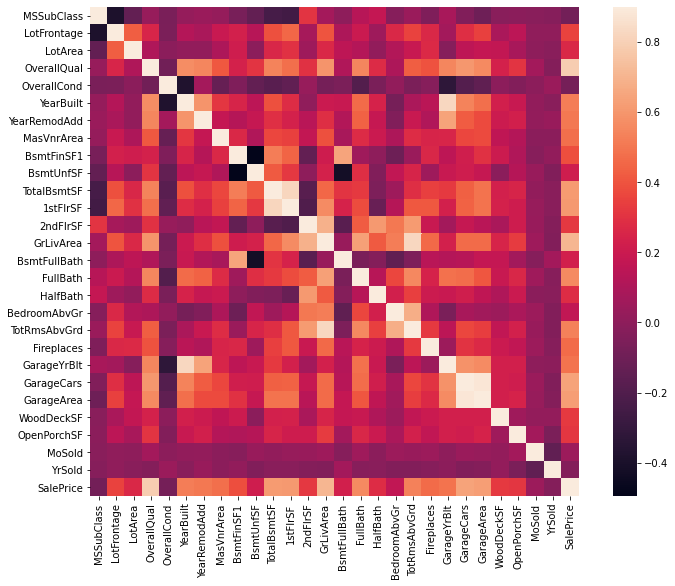

In [64]:
corrmat = df_val.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#<h3>1. Overall quality:  we can see the sale price increases with the Overall quality of the house<br>
    2. Garage Area: We Can also see that Sales proice inreases with Garage area uptil 800 sq feet, it reduces after that  <br>
    3. GarageYrBlt: We can aslo see that the newer the garage,more the Sale price is.<br>
    4. Sales price seems to increase with YearRemodAdd<br>
    5. Sales price seems todecrease with BsmtFullBath and BsmtHalfBath<br>
    6. Sales price seems toincrease with FullBath<br>
    7. Sales price seems to be higher with 1 KitchenAbvGr<br>
    8. Sales price seems to increase uptil 3 GarageCars and then decrese if GarageCars incrwases more than 3<br></h3>


In [65]:
#Get catagorical data
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [95]:
df_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [96]:
categorical_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,]
print(df[categorical_features].isnull().sum())


BsmtQual        37
BsmtCond        37
BsmtExposure    38
BsmtFinType1    37
BsmtFinType2    38
GarageType      81
GarageFinish    81
GarageQual      81
GarageCond      81
FireplaceQu      0
dtype: int64


In [97]:
df[categorical_features] = df[categorical_features].fillna(value='Not_applicable', axis=1)

In [98]:
df_cat=df[categorical_features] 

In [99]:
# convert to dummy
df_dummies = pd.get_dummies(df_cat, drop_first=True)
df_dummies.head()

,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_Not_applicable,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Not_applicable,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,...,GarageCond_Fa,GarageCond_Gd,GarageCond_Not_applicable,GarageCond_Po,GarageCond_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0,1,0,0,0,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [100]:

df_final = pd.concat([df_val, df_dummies], axis=1)

In [101]:
df_final.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,...,GarageCond_Fa,GarageCond_Gd,GarageCond_Not_applicable,GarageCond_Po,GarageCond_TA,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NA,FireplaceQu_Po,FireplaceQu_TA
0,60,65.0,8450,7,5,2003,2003,196.0,706,150,...,0,0,0,0,1,0,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,284,...,0,0,0,0,1,0,0,0,0,1
2,60,68.0,11250,7,5,2001,2002,162.0,486,434,...,0,0,0,0,1,0,0,0,0,1
3,70,60.0,9550,7,5,1915,1970,0.0,216,540,...,0,0,0,0,1,0,1,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,490,...,0,0,0,0,1,0,0,0,0,1


In [106]:
df_final.shape

(1121, 76)

In [107]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)




In [108]:
df_final=clean_dataset(df_final)

C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


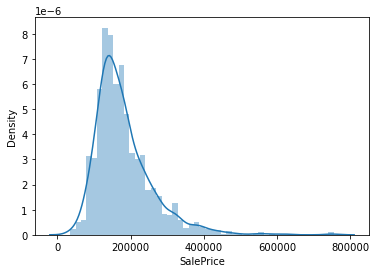

In [111]:
sns.distplot(df['SalePrice'])
plt.show()

C:\Users\Sanjay\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


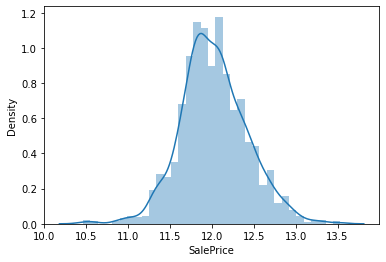

In [112]:
sns.distplot(np.log(df['SalePrice']))
plt.show()

#<h3> Scaling

In [116]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [117]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(751, 75)
(370, 75)
(751,)
(370,)


In [109]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [120]:
stdscaler = StandardScaler()
stdscaler.fit(X_train)

StandardScaler()

In [121]:
X_tr_scaled = pd.DataFrame(data=stdscaler.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=stdscaler.transform(X_test), columns=X_test.columns)

In [122]:
#train data
print(X_tr_scaled)

# test data
print(X_te_scaled) 

     MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0     -0.861084     0.923467  0.007499     0.579325    -0.527616   1.211635   
1     -0.120052    -0.429129 -0.459233    -0.138617     0.431802  -1.002167   
2      0.126959     0.525645 -0.013177     0.579325     0.431802   1.146523   
3      2.597065    -1.622596 -0.777315    -0.138617    -0.527616   1.211635   
4      0.620980     0.366516 -0.160661    -0.138617     1.391219  -0.025490   
..          ...          ...       ...          ...          ...        ...   
746   -0.861084     0.366516  0.281261    -0.856560     0.431802   0.169846   
747   -0.861084     0.963249  0.196227     0.579325    -0.527616   1.081411   
748    2.597065    -1.622596 -0.758230     0.579325    -0.527616   1.081411   
749    0.126959     0.406298  0.064965     0.579325    -0.527616   0.723296   
750   -0.861084     0.764338 -0.522850    -0.856560     1.391219  -0.578940   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtUnfS

In [123]:
#Initial Feature Selection with RFE
def top_n_features(n):
    top_n_cols = []
    global X_tr_scaled, y_train
    
    linear_m = LinearRegression()
    rfe = RFE(linear_m, n_features_to_select = n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [124]:
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'YrSold', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_Not_applicable', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Not_applicable', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Not_applicable', 'BsmtFinType1_GLQ', 'BsmtFinType1_Not_applicable', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_Not_applicable', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_TA', 'FireplaceQu_NA', 'FireplaceQu_Po', 'FireplaceQu_TA']
Top 50 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',

In [126]:
def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary()) 

In [127]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     101.9
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.29e-271
Time:                        22:35:35   Log-Likelihood:                 385.11
No. Observations:                 751   AIC:                            -682.2
Df Residuals:                     707   BIC:                            -478.9
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [128]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     90.79
Date:                Tue, 17 May 2022   Prob (F-statistic):          7.76e-267
Time:                        22:35:46   Log-Likelihood:                 385.61
No. Observations:                 751   AIC:                            -673.2
Df Residuals:                     702   BIC:                            -446.8
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [129]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     88.89
Date:                Tue, 17 May 2022   Prob (F-statistic):          5.64e-266
Time:                        22:35:55   Log-Likelihood:                 385.91
No. Observations:                 751   AIC:                            -671.8
Df Residuals:                     701   BIC:                            -440.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [130]:
def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(df['SalePrice'], df[feature])
        plt.tight_layout()

In [131]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     88.89
Date:                Tue, 17 May 2022   Prob (F-statistic):          5.64e-266
Time:                        22:36:25   Log-Likelihood:                 385.91
No. Observations:                 751   AIC:                            -671.8
Df Residuals:                     701   BIC:                            -440.8
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [132]:
top_60= top_n_features(60)
build_regressor(X_tr_scaled,y_train,top_60)

Top 60 features : 
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'YrSold', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_Not_applicable', 'BsmtQual_TA', 'BsmtCond_Gd', 'BsmtCond_Not_applicable', 'BsmtCond_Po', 'BsmtCond_TA', 'BsmtExposure_Gd', 'BsmtExposure_Not_applicable', 'BsmtFinType1_GLQ', 'BsmtFinType1_Not_applicable', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_Not_applicable', 'GarageType_Attchd', 'GarageType_BuiltIn', 'GarageType_Detchd', 'GarageType_Not_applicable', 'GarageFinish_Not_applicable', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Not_applicable', 'GarageQual_Po', 'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 

In [133]:

X_train_rfe = X_tr_scaled[top_55]
X_test_rfe = X_te_scaled[top_55]

In [134]:
def build_model(X_train, y_train, X_test, params, model='ridge'):
  if model == 'ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

In [135]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for ridge is 100.000000
ridge  Regression with  100
R2 score (train) :  0.8552959343893364
R2 score (test) :  0.8780137810405912
RMSE (train) :  0.14787866916151213
RMSE (test) :  0.14359446373724835


In [136]:
#UsingLasso 
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\Sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.4330781071818901, tolerance: 0.00886768580126282
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2518304095239747, tolerance: 0.009062592999779451
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25974917362271555, tolerance: 0.009390792357502162
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sanjay\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: C

Optimum alpha for lasso is 0.010000
lasso  Regression with  0.01
R2 score (train) :  0.8441153275750314
R2 score (test) :  0.8734527193608878
RMSE (train) :  0.153485330671921
RMSE (test) :  0.14625432556276216


In [138]:

model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

<ipython-input-138-0542c406ee93>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  model_coefficients.rows = X_test_rfe.columns


,Ridge (alpha=9.0),Lasso (alpha=0.0001)
MSSubClass,-0.032257,-0.026150
LotFrontage,-0.006855,0.000000
LotArea,0.017046,0.012878
OverallQual,0.086253,0.125351
OverallCond,0.042903,0.037482
YearBuilt,0.038906,0.056271
YearRemodAdd,0.028392,0.025192
BsmtFinSF1,-0.019395,0.000000
TotalBsmtSF,0.013540,0.000637
1stFlrSF,0.029056,0.004352
